# Useful Functions and Code

---

In [11]:
import pandas as pd
import numpy as np
import requests
import json
import time
import datetime
from time import sleep
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import wordcloud
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

## Make a Class and add attributes

https://towardsdatascience.com/object-oriented-programming-for-data-scientists-build-your-ml-estimator-7da416751f64

## NB Extensions

```
!pip install https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tarball/master  
!pip install jupyter_nbextensions_configurator  
!jupyter contrib nbextension install --user  
!jupyter nbextensions_configurator enable --user
```

## High Resolution Notebooks

```%config InlineBackend.figure_format ='retina'```

## Scatter Plot

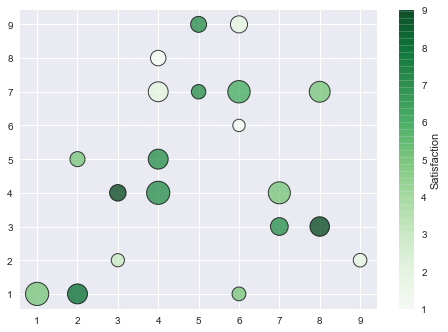

In [4]:
plt.style.use('seaborn')

x = [5, 7, 8, 5, 6, 7, 9, 2, 3, 4, 4, 4, 2, 6, 3, 6, 8, 6, 4, 1]
y = [7, 4, 3, 9, 1, 3, 2, 5, 2, 4, 8, 7, 1, 6, 4, 9, 7, 7, 5, 1]


colors = [7, 5, 9, 7, 5, 7, 2, 5, 3, 7, 1, 2, 8, 1, 9, 2, 5, 6, 7, 5]

sizes = [209, 486, 381, 255, 191, 315, 185, 228, 174,
          538, 239, 394, 399, 153, 273, 293, 436, 501, 397, 539]

plt.scatter(x, y, s=sizes, c=colors, cmap='Greens', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Satisfaction')

plt.gcf().

## Decision Tree Visual

In [ ]:
x_cols = ['inc', 'male', 'age', 'fsize', 'nettfa']

dt = DecisionTreeClassifier(max_depth=3)

dt.fit(df[x_cols], df['p401k'])

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# initialize the output file object
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['No 401K', '401K'],
                feature_names=x_cols)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Plotting Real Time Data

In [21]:
# https://www.youtube.com/watch?v=Ercd-Ip5PfQ&list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_&index=9

import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML


plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []




index = count()

def animate(i):
    x_vals.append(next(index))
    y_vals.append(random.randint(0, 5))
    
    plt.cla()
    plt.plot(x_vals, y_vals)
    

ani = FuncAnimation(plt.gcf(), animate, interval=1000)


plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

## Animations

RuntimeError: Requested MovieWriter (ffmpeg) not available

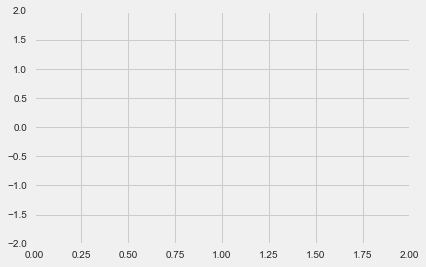

In [20]:
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

matplotlib.rcParams['animation.writer'] = 'ffmpeg'
HTML(anim.to_html5_video())

## Preprocessor and Estimator Dictionaries

In [ ]:
# preprocessors

count_vec = {
    'name': 'CountVectorizer',
    'abbr': 'count_vec',
    'estimator': CountVectorizer(),
    'pipe_params' : {
                'count_vec__max_features': [5000],
                'count_vec__max_df': [.3,.4,.5],
                'count_vec__ngram_range': [(1,2)],
                'count_vec__stop_words': ['english'],
                'count_vec__min_df': [4,5,6]}
}


tfidf = {
    'name': 'TfidVectorizer',
    'abbr': 'tfidf',
    'estimator': TfidfVectorizer(),
    'pipe_params' : {
                'tfidf__strip_accents': [None],
                'tfidf__stop_words': ['english'],
                'tfidf__ngram_range': [(1, 1)],                   
                'tfidf__max_features': [5000]}
}

    
    
# Estimators
    
lr = {
    'name': 'Logistic Regression',
    'abbr': 'lr',
    'estimator': LogisticRegression(),
    'pipe_params' : {
                'lr__penalty': ['l1','l2'],
                'lr__C': [.01,.1,1,3]}
}


rf = {
    'name': 'Random Forest',
    'abbr': 'rf',
    'estimator': RandomForestClassifier(),
    'pipe_params' : {
                'rf__n_estimators': [100, 200, 300],
                'rf__max_depth': [200],
                'rf__min_samples_leaf': [1,2,3],
                'rf__min_samples_split': [.0005, .001, .01]}
}


knn = {
    'name': 'K Nearest Neighbors',
    'abbr': 'knn',
    'estimator': KNeighborsClassifier(),
    'pipe_params' : {
                'knn__n_neighbors': [3,5,7],
                'knn__metric': ['manhattan']}
}

    
mnb = {
    'name': 'Multinomial Bayes Classifier',
    'abbr': 'mnb',
    'estimator': MultinomialNB(),
    'pipe_params' : {
                'mnb__fit_prior': [False],
                'mnb__alpha': [0,.1,1]}
}
    
    
svc = {
    'name': 'Support Vector Classifier',
    'abbr': 'svc',
    'estimator': SVC(),
    'pipe_params' : {
                'svc__C': [1,2,3,4,5],
                'svc__kernel': ['linear', 'poly','rbf'],
                'svc__gamma': ['scale'],
                'svc__degree': [1,2,3,4,5],
                'svc__probability': [True]}
}




## Feature Importance Graph

In [23]:
## lr_feats and lr_catcher need to be passed into the function to account for unexpected variability




def feat_important_graph(feature_names, coefficients):
    '''
    Function takes two arguments: 'feature_names' and 'coefficients'
    feature_names should come from a fitted model .get_feature_names()
    coefficients should come from a fitted model .coef_
    Easiest to make these a variable first and pass in the variable to the function
    ***
    Use the following format if using a gridsearch or pipeline:
    grid.best_estimator_.named_steps['preprocessor'].get_feature_names()
    grid.best_estimator_.named_steps['estimator'].coef_
    '''
    # Set up the plot
    plt.figure(figsize=(16, 12))
    plt.title('Feature Importance (Coefficients)', fontsize=20)
    plt.ylabel('Features', fontsize=18)
    plt.xlabel('(Abs) Coefficients', fontsize=18)

    # Make a dataframe from the coefficients and feature names
    coef_df = pd.DataFrame(coefficients, columns=feature_names).T
    coef_df['abs_coef'] = coef_df[0].abs()
    coef_df.sort_values('abs_coef', ascending=False)[0].head(15).plot(kind='barh');

## Pretty Print All Lines of Output

In [ ]:
from IPython.core.interactiveshell import InteractiveShell

# pretty print all cell's output and not just the last one
InteractiveShell.ast_node_interactivity = "all"